In [ ]:
import requests
from bs4 import BeautifulSoup as soup
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [ ]:
url ='https://understat.com/player/8260'

In [ ]:
html = requests.get(url)

In [ ]:
html.content

In [ ]:
parse_soup = soup(html.content,'lxml')

In [ ]:
scripts = parse_soup.find_all('script')
len(scripts)

25

In [ ]:
scripts[3].string

"\n\tvar shotsData \t= JSON.parse('\\x5B\\x7B\\x22id\\x22\\x3A\\x22354876\\x22,\\x22minute\\x22\\x3A\\x2258\\x22,\\x22result\\x22\\x3A\\x22Goal\\x22,\\x22X\\x22\\x3A\\x220.8880000305175781\\x22,\\x22Y\\x22\\x3A\\x220.6659999847412109\\x22,\\x22xG\\x22\\x3A\\x220.07933320105075836\\x22,\\x22player\\x22\\x3A\\x22Erling\\x20Haaland\\x22,\\x22h_a\\x22\\x3A\\x22a\\x22,\\x22player_id\\x22\\x3A\\x228260\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222019\\x22,\\x22shotType\\x22\\x3A\\x22LeftFoot\\x22,\\x22match_id\\x22\\x3A\\x2212562\\x22,\\x22h_team\\x22\\x3A\\x22Augsburg\\x22,\\x22a_team\\x22\\x3A\\x22Borussia\\x20Dortmund\\x22,\\x22h_goals\\x22\\x3A\\x223\\x22,\\x22a_goals\\x22\\x3A\\x225\\x22,\\x22date\\x22\\x3A\\x222020\\x2D01\\x2D18\\x2014\\x3A30\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Jadon\\x20Sancho\\x22,\\x22lastAction\\x22\\x3A\\x22Throughball\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22354881\\x22,\\x22minute\\x22\\x3A\\x2269\\x22,\\x22result\\x22\\x3A\\

In [ ]:
strings = scripts[3].string

In [ ]:
ind_start = strings.index("('")+2
ind_end = strings.index("')")

json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')

json_data

'[{"id":"354876","minute":"58","result":"Goal","X":"0.8880000305175781","Y":"0.6659999847412109","xG":"0.07933320105075836","player":"Erling Haaland","h_a":"a","player_id":"8260","situation":"OpenPlay","season":"2019","shotType":"LeftFoot","match_id":"12562","h_team":"Augsburg","a_team":"Borussia Dortmund","h_goals":"3","a_goals":"5","date":"2020-01-18 14:30:00","player_assisted":"Jadon Sancho","lastAction":"Throughball"},{"id":"354881","minute":"69","result":"Goal","X":"0.98","Y":"0.48900001525878906","xG":"0.9206209778785706","player":"Erling Haaland","h_a":"a","player_id":"8260","situation":"OpenPlay","season":"2019","shotType":"LeftFoot","match_id":"12562","h_team":"Augsburg","a_team":"Borussia Dortmund","h_goals":"3","a_goals":"5","date":"2020-01-18 14:30:00","player_assisted":"Thorgan Hazard","lastAction":"Pass"},{"id":"354883","minute":"78","result":"Goal","X":"0.8830000305175781","Y":"0.34700000762939454","xG":"0.32283100485801697","player":"Erling Haaland","h_a":"a","player_id

In [ ]:
data = json.loads(json_data)
data

[{'id': '354876',
  'minute': '58',
  'result': 'Goal',
  'X': '0.8880000305175781',
  'Y': '0.6659999847412109',
  'xG': '0.07933320105075836',
  'player': 'Erling Haaland',
  'h_a': 'a',
  'player_id': '8260',
  'situation': 'OpenPlay',
  'season': '2019',
  'shotType': 'LeftFoot',
  'match_id': '12562',
  'h_team': 'Augsburg',
  'a_team': 'Borussia Dortmund',
  'h_goals': '3',
  'a_goals': '5',
  'date': '2020-01-18 14:30:00',
  'player_assisted': 'Jadon Sancho',
  'lastAction': 'Throughball'},
 {'id': '354881',
  'minute': '69',
  'result': 'Goal',
  'X': '0.98',
  'Y': '0.48900001525878906',
  'xG': '0.9206209778785706',
  'player': 'Erling Haaland',
  'h_a': 'a',
  'player_id': '8260',
  'situation': 'OpenPlay',
  'season': '2019',
  'shotType': 'LeftFoot',
  'match_id': '12562',
  'h_team': 'Augsburg',
  'a_team': 'Borussia Dortmund',
  'h_goals': '3',
  'a_goals': '5',
  'date': '2020-01-18 14:30:00',
  'player_assisted': 'Thorgan Hazard',
  'lastAction': 'Pass'},
 {'id': '3548

In [ ]:
x = []
y = []
xg = []
result = []
season = []

for i,_ in enumerate(data):
    for key in data[i]:
        if key=='X':
            x.append(data[i][key])
        if key=='Y':
            y.append(data[i][key])
        if key=='xG':
            xg.append(data[i][key])
        if key=='result':
            result.append(data[i][key])
        if key=='season':
            season.append(data[i][key])

In [ ]:
columns = ['X','Y','xG','Result','Season']
df_understat = pd.DataFrame([x, y, xg, result, season], index=columns)
df_understat

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
X,0.8880000305175781,0.98,0.8830000305175781,0.8859999847412109,0.955,0.9869999694824219,0.9740000152587891,0.915,0.9359999847412109,0.9269999694824219,...,0.9590000152587891,0.8480000305175781,0.875,0.9,0.9169999694824219,0.9680000305175781,0.9059999847412109,0.9319999694824219,0.885,0.915
Y,0.6659999847412109,0.48900001525878906,0.34700000762939454,0.639000015258789,0.495,0.325,0.5429999923706055,0.5609999847412109,0.695,0.4540000152587891,...,0.5820000076293945,0.4520000076293945,0.5459999847412109,0.6509999847412109,0.5279999923706055,0.5159999847412109,0.600999984741211,0.5279999923706055,0.5,0.534000015258789
xG,0.07933320105075836,0.9206209778785706,0.32283100485801697,0.11918099969625473,0.7466409802436829,0.4675059914588928,0.6271569728851318,0.1558070033788681,0.058969900012016296,0.04765170067548752,...,0.45892301201820374,0.06718594580888748,0.039508529007434845,0.12026067823171616,0.43265312910079956,0.5429558753967285,0.10977182537317276,0.46968236565589905,0.7611688375473022,0.5385527014732361
Result,Goal,Goal,Goal,BlockedShot,Goal,Goal,Goal,Goal,SavedShot,MissedShots,...,MissedShots,BlockedShot,MissedShots,SavedShot,MissedShots,Goal,SavedShot,Goal,Goal,Goal
Season,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,...,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022


In [ ]:
df_understat = df_understat.T
df_understat = df_understat.apply(pd.to_numeric,errors='ignore')
df_understat

,X,Y,xG,Result,Season
0,0.888,0.666,0.079333,Goal,2019
1,0.980,0.489,0.920621,Goal,2019
2,0.883,0.347,0.322831,Goal,2019
3,0.886,0.639,0.119181,BlockedShot,2019
4,0.955,0.495,0.746641,Goal,2019
...,...,...,...,...,...
274,0.968,0.516,0.542956,Goal,2022
275,0.906,0.601,0.109772,SavedShot,2022
276,0.932,0.528,0.469682,Goal,2022
277,0.885,0.500,0.761169,Goal,2022


In [ ]:
# THE X AND Y LABELS ARE SCALED BETWEEN 0 and 1. SINCE WE WILL BE USING OPTA AXES WHICH GO FROM 100 to 100, WE NEED TO
# SCALE BOTH THESE UPTO 100

df_understat['X'] = df_understat['X'].apply(lambda x:x*100)
df_understat['Y'] = df_understat['Y'].apply(lambda x:x*100)

df_understat

,X,Y,xG,Result,Season
0,88.800003,66.599998,0.079333,Goal,2019
1,98.000000,48.900002,0.920621,Goal,2019
2,88.300003,34.700001,0.322831,Goal,2019
3,88.599998,63.900002,0.119181,BlockedShot,2019
4,95.500000,49.500000,0.746641,Goal,2019
...,...,...,...,...,...
274,96.800003,51.599998,0.542956,Goal,2022
275,90.599998,60.099998,0.109772,SavedShot,2022
276,93.199997,52.799999,0.469682,Goal,2022
277,88.500000,50.000000,0.761169,Goal,2022


In [ ]:
def readfromhtml(filepath):
    df = pd.read_html(filepath)[0]
    column_lst = list(df.columns)
    for index in range(len(column_lst)):
        column_lst[index] = column_lst[index][1]

    df.columns = column_lst
    df.drop(df[df['Player'] == 'Player'].index, inplace=True)
    df = df.fillna('0')
    df.set_index('Rk', drop=True, inplace=True)
    try:
        df['Comp'] = df['Comp'].apply(lambda x: ' '.join(x.split()[1:]))
        df['Nation'] = df['Nation'].astype(str)
        df['Nation'] = df['Nation'].apply(lambda x: x.split()[-1])
    except:
        print('Error in uploading file:' + filepath)
    finally:
        df = df.apply(pd.to_numeric, errors='ignore')
        return df

In [ ]:
df_fbref = readfromhtml('https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats')

In [ ]:
df_fbref.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 1 to 2584
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   2584 non-null   object 
 1   Nation   2584 non-null   object 
 2   Pos      2584 non-null   object 
 3   Squad    2584 non-null   object 
 4   Comp     2584 non-null   object 
 5   Age      2584 non-null   object 
 6   Born     2584 non-null   int64  
 7   90s      2584 non-null   float64
 8   Gls      2584 non-null   int64  
 9   Sh       2584 non-null   int64  
 10  SoT      2584 non-null   int64  
 11  SoT%     2584 non-null   float64
 12  Sh/90    2584 non-null   float64
 13  SoT/90   2584 non-null   float64
 14  G/Sh     2584 non-null   float64
 15  G/SoT    2584 non-null   float64
 16  Dist     2584 non-null   float64
 17  FK       2584 non-null   int64  
 18  PK       2584 non-null   int64  
 19  PKatt    2584 non-null   int64  
 20  xG       2584 non-null   float64
 21  npxG     2584 non-n

In [ ]:
df_fbref[df_fbref['Player'].str.contains('Nkunku')]

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
Rk,,,,,,,,,,,,,,,,,,,,,
1733,Christopher Nkunku,FRA,"FW,MF",RB Leipzig,Bundesliga,25-081,1997,14.2,12,41,...,15.8,4,2,3,8.7,6.4,0.16,3.3,3.6,Matches


In [ ]:
!pip install mplsoccer
!pip install highlight-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 KB 4.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from highlight_text import ax_text,fig_text
import mplsoccer

In [ ]:
background = '#E7F2F6'
text_color = 'black'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='Candara'
mpl.rcParams['legend.fontsize'] = 15

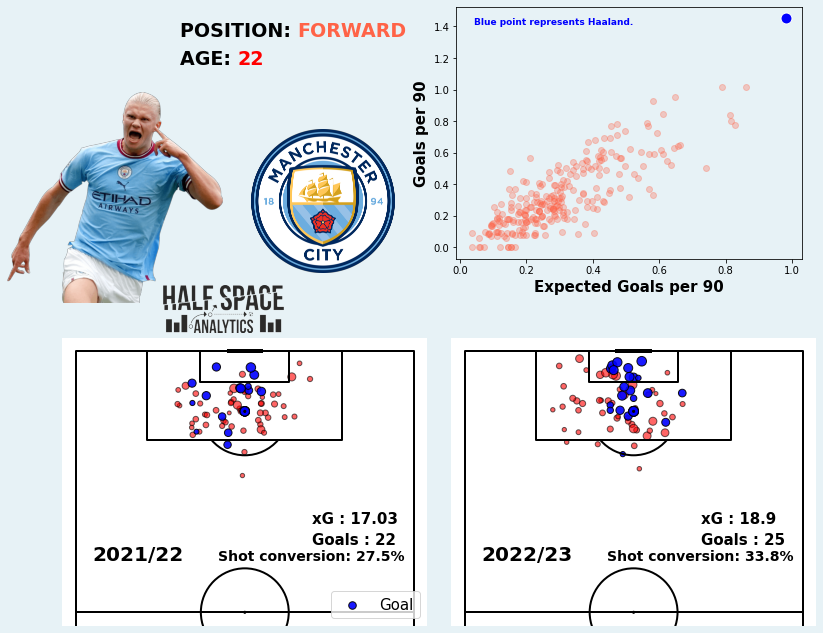

In [ ]:
# SETTING UP THE AXES
fig, ax = plt.subplots(figsize=(12,10))
ax.axis('off')
fig.set_facecolor(background)

#SETTING UP THE MPL AXIS FOR THE FIRST SEASON
pitch = mplsoccer.VerticalPitch(half=True,pitch_type='opta',line_zorder=3,
                                pitch_color='white',line_color='black')
ax_opta1 = fig.add_axes((0.05, 0.06, 0.45, 0.4))
ax_opta1.patch.set_facecolor(background)
pitch.draw(ax=ax_opta1)

#PLOTTING OTHER SHOTS
df_fil = df_understat.loc[df_understat['Season']==2021]

pitch.scatter(df_fil[df_fil['Result']!='Goal']['X'],df_fil[df_fil['Result']!='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']!='Goal']['xG'])*100, marker='o', alpha=0.6,
              edgecolor='black', facecolor='red', ax=ax_opta1)

#NOW PLOTTING THE GOALS IN THE 2019-20 SEASON
pitch.scatter(df_fil[df_fil['Result']=='Goal']['X'],df_fil[df_fil['Result']=='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']=='Goal']['xG'])*100, marker='o', alpha=0.9,
              edgecolor='black', facecolor='blue', ax=ax_opta1, label='Goal')

# ADDING THE LEGEND
ax_opta1.legend(loc='lower right').get_texts()[0].set_color("black")

ax_opta1.text(30,63,'Goals : '+str(len(df_fil[df_fil['Result']=='Goal'])), weight='bold', size=15)
ax_opta1.text(30,67,f"xG : {round(sum(df_fil['xG']),2)}", weight='bold', size=15)
ax_opta1.text(58,60,'Shot conversion: '+str(round(len(df_fil[df_fil['Result']=='Goal'])*100/len(df_fil),1))+'%', weight='bold', size=14)
ax_opta1.text(95,60, '2021/22', weight='bold', size=20)

# DOING THE SAME FOR THE 20-21 SEASON TOO
ax_opta2 = fig.add_axes((0.50, 0.06, 0.45, 0.4))
ax_opta2.patch.set_facecolor(background)
pitch.draw(ax=ax_opta2)

#PLOTTING OTHER SHOTS
df_fil = df_understat.loc[df_understat['Season']==2022]

pitch.scatter(df_fil[df_fil['Result']!='Goal']['X'],df_fil[df_fil['Result']!='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']!='Goal']['xG'])*110, marker='o', alpha=0.6,
              edgecolor='black', facecolor='red', ax=ax_opta2)

#NOW PLOTTING THE GOALS IN THE 2019-20 SEASON
pitch.scatter(df_fil[df_fil['Result']=='Goal']['X'],df_fil[df_fil['Result']=='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']=='Goal']['xG'])*110, marker='o', alpha=0.9,
              edgecolor='black', facecolor='blue', ax=ax_opta2, label='Goal')

# ADDING THE LEGEND


ax_opta2.text(30,63,'Goals : '+str(len(df_fil[df_fil['Result']=='Goal'])), weight='bold', size=15)
ax_opta2.text(30,67,f"xG : {round(sum(df_fil['xG']),2)}", weight='bold', size=15)
ax_opta2.text(58,60,'Shot conversion: '+str(round(len(df_fil[df_fil['Result']=='Goal'])*100/len(df_fil),1))+'%', weight='bold', size=14)
ax_opta2.text(95,60, '2022/23', weight='bold', size=20)

# NOW PLOTTING THE SCATTERPLOT
ax_scatter = fig.add_axes([0.52,0.57,0.4,0.35])
ax_scatter.patch.set_facecolor(background)

# SETTING UP THE X AND Y OF THE SCATTERPLOT
no_90s = 10
df_fil = df_fbref[df_fbref['90s']>=no_90s]
df_fil = df_fil[df_fil['Pos'].apply(lambda x: x in ['FW','MF,FW','FW,MF'])]

x,y = (df_fil['xG']/df_fil['90s']).to_list(), (df_fil['Gls']/df_fil['90s']).to_list()

ax_scatter.scatter(x,y,alpha=0.3,c='tomato')

# NOW FILTERING ERLING HAALAND'S DATA
df_player = df_fil[df_fil['Player']=='Erling Haaland']
ax_scatter.scatter(df_player['xG']/df_player['90s'], df_player['Gls']/df_player['90s'], c='blue',s=120,edgecolor='white')

# ADDING FINISHING TOUCHES TO THE SCATTERPLOT

ax_scatter.set_xlabel('Expected Goals per 90', fontdict = {'fontsize':15, 'weight' : 'bold', 'color':text_color})
ax_scatter.set_ylabel('Goals per 90', fontdict = dict(fontsize = 15, weight = 'bold',color=text_color))


#ADDING HAALAND'S IMAGE
ax_player = fig.add_axes([0,0.43,0.25,0.45])
ax_player.axis('off')
im = plt.imread('haaland.png')
ax_player.imshow(im)

# ADDING TITLES AND INFO
fig_text(0.17,0.98,"<ERLING HAALAND's> FINISHING",weight='heavy', size=25, highlight_textprops=[{'color':'blue'}])
fig_text(0.2,0.9,'POSITION: <FORWARD>',weight='bold', size=19, highlight_textprops=[{'color':'tomato'}])
fig_text(0.2,0.86,'AGE: <22>',weight='bold', size=19, highlight_textprops=[{'color':'red'}])
fig_text(0.54,0.905,'Blue point represents Haaland.',weight='bold', size=9, color='blue')

# ADDING CLUB LOGO
ax_team = fig.add_axes([0.265,0.55,0.2,0.2])
ax_team.axis('off')
im = plt.imread('city.png')
ax_team.imshow(im)

ax_team = fig.add_axes([0.18,0.43,0.14,0.14])
ax_team.axis('off')
im = plt.imread('/content/Half Space Preto.png')
ax_team.imshow(im)

# ADDING A FOOTER
fig_text(0.05,0.03,'Data from Fbref and Understat. Comparison with <Forwards>'+
        ' with more than 900 minutes in the domestic competitions.',
        size=12, highlight_textprops=[{'color':'tomato'}], weight = 'bold')

plt.savefig('hall_viz.png',dpi=300,facecolor=background)